# Ford GoBike Data Exploration
## by Sarah Abdelkader

## Investigation Overview

The aim of this presentation is to tackle the power of various data visualsation techniques in conveying results of data analysis proces in a readable yet infomrative way.

## Dataset Overview

The dataset used in this study is extracted from "**Ford GoBike**" bike-sharing system.

The raw dataset consists of 183,412 records, each representing s bike trip recorded by Ford Gobike system.
Total number of feature which include details about:

Trip Details (Start and End time of each trip, Station Names and unique IDs, Stations' Coordinates)
User Details (User Group whether customer or subscriber, User Date of Birth, Gender )       

In [96]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import calendar
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [97]:
# load in the dataset into a pandas dataframe
df= pd.read_csv("df_slides.csv")
df.head()

,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_gender,age,AgeGroup,duration_min,start_hour,Day,Day_Order
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,Customer,Male,38.0,30-45,869.75,17,Thu,4
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,Male,50.0,Above 45,1030.90,12,Thu,4
2,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,Subscriber,Other,33.0,30-45,608.17,17,Thu,4
3,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,Male,48.0,Above 45,26.42,23,Thu,4
4,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,Subscriber,Male,63.0,Above 45,29.88,23,Thu,4


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Different User Groups 

This vislualization illustrate the ratio between 2 bike user groups:
- *Subscribers*
- *Customers*

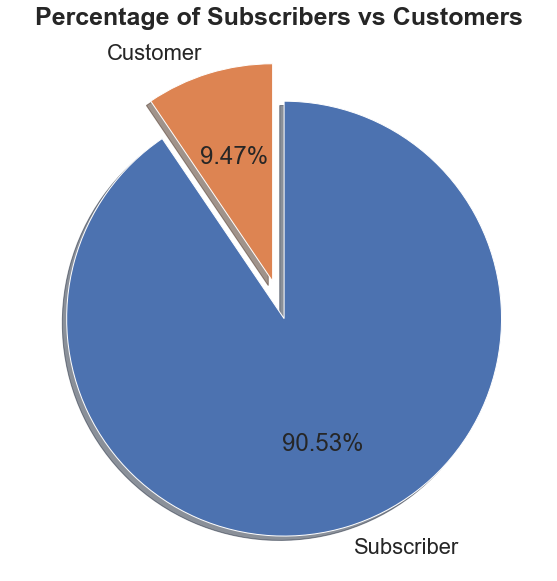

In [98]:
#https://www.statology.org/seaborn-pie-chart/
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

#define data
user_grp= df['user_type'].value_counts()

#define Seaborn color palette
colors = sns.color_palette('deep')
#create pie chart
plt.figure(figsize=(15,10))
sns.set_theme( font_scale=2)
explode = (0.08, 0.1)
plt.pie(user_grp, labels = user_grp.index, shadow=True, explode=explode, counterclock = False, startangle = 90, colors=colors, autopct='%.2f%%');
plt.title('Percentage of Subscribers vs Customers', fontsize=25,weight='bold');

The graph shows that majority of bike users are subscribed to Ford GoBike System.

### Now let's have a look on  the distribution of users based on their age.

## Distribution of Users by Age

In this chart, I demontrated the distribution of all bike users by their age, regardless of their subscription type or gender.

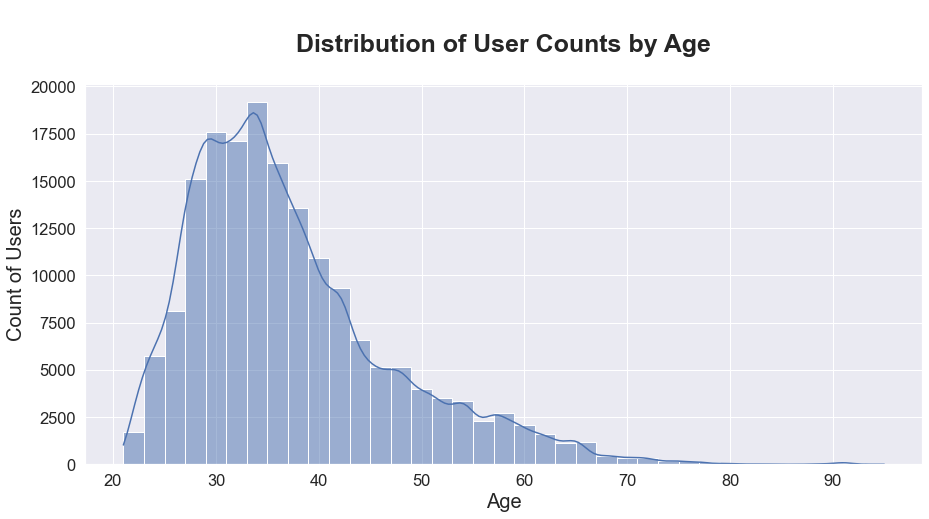

In [99]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_theme( font_scale=1.5)
sns.histplot(df['age'], binwidth=2, kde=True)
plt.title('\nDistribution of User Counts by Age\n',fontsize = 25,weight='bold')
plt.xlabel('Age',fontsize = 20)
plt.ylabel('Count of Users',fontsize = 20)
plt.show()

The graph shows that majority of bike users is between the age of 30-40. We see that as the age gets higher, the number of users decline. 

This completely makes sense, since biking is an activity that requires some physical strength.

## Trip Counts Per Hour



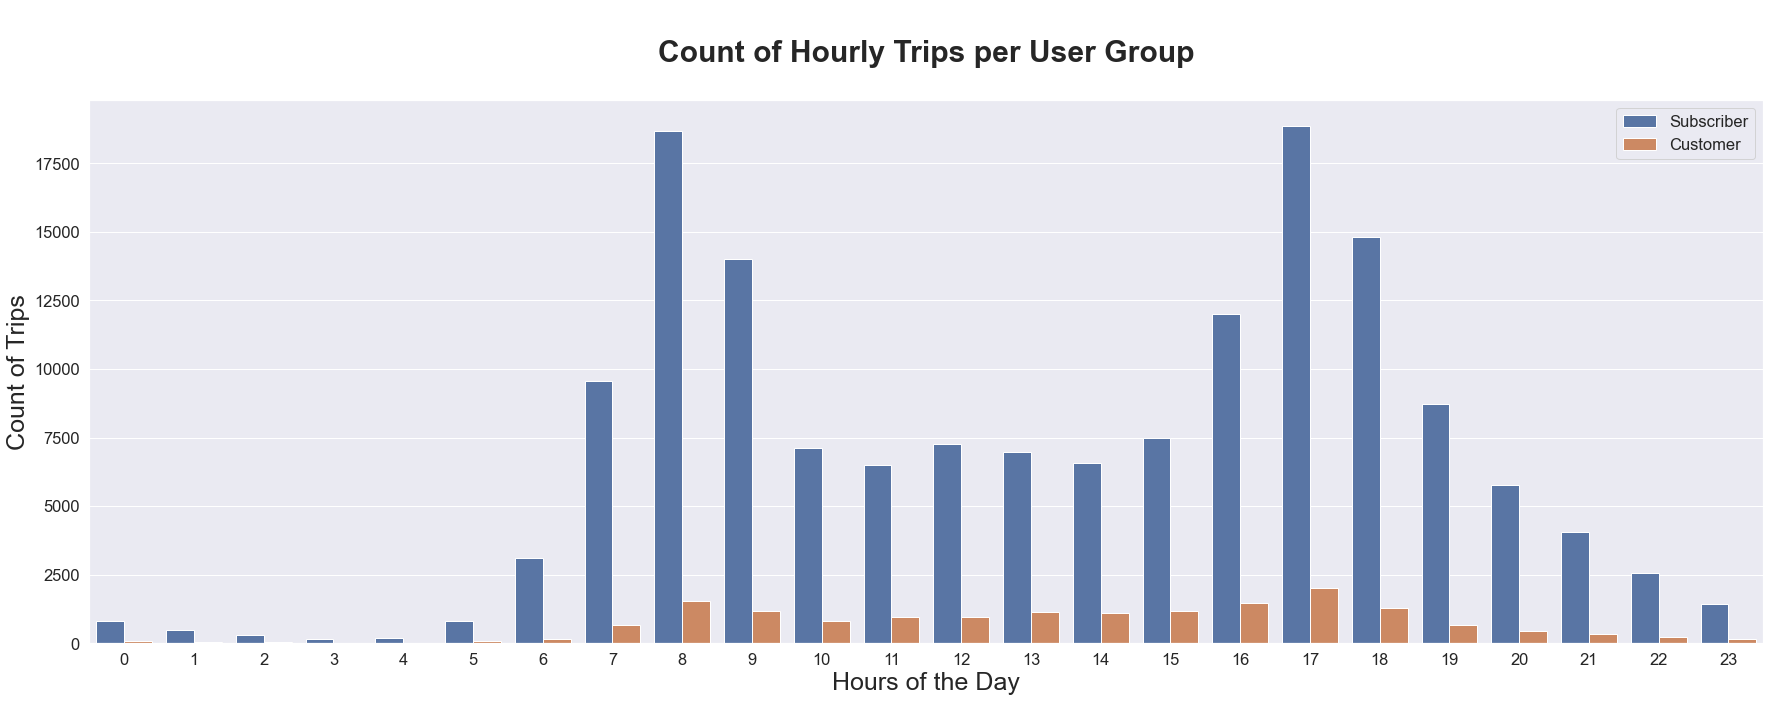

In [100]:
duration_hour=df
duration_hour.index=[df['start_hour']]
duration_hour.sort_index(inplace=True)

#Count of Daily Trips per User Group
plt.figure(figsize = (30, 10))
sns.set_theme( font_scale= 1.5)
sns.countplot(data = duration_hour, x=duration_hour['start_hour'] , hue = 'user_type',palette='deep')
plt.title('\nCount of Hourly Trips per User Group\n', fontsize=30, weight='bold')
plt.xlabel('Hours of the Day',  fontsize=25)
plt.ylabel('Count of Trips',  fontsize=25)
plt.legend()
plt.show()

The Chart shows that majority of trips were made at 8 pm and 5 pm. It illustrates that users take bikes to commute to and from work.

Next chart will emphasize this by taking a closer look on the relation between count of trips on daily basis. 

## Trip Counts Per Day



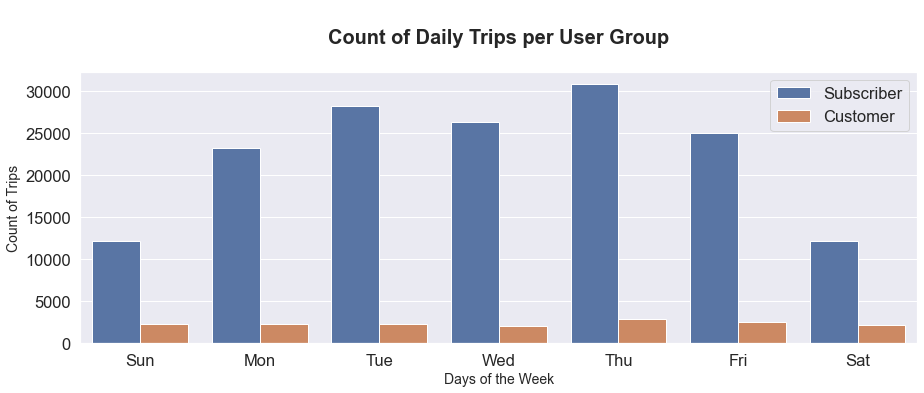

In [ ]:
#Count of Daily Trips per User Group
duration_day=df
duration_day.index=duration_day['Day_Order']
duration_day.sort_index(inplace=True)
plt.figure(figsize = (15, 5))
sns.countplot(data = duration_day, x=duration_day['Day'], hue = 'user_type',palette='deep')
plt.title('\nCount of Daily Trips per User Group\n', fontsize=20, weight='bold')
plt.xlabel('Days of the Week',  fontsize=14)
plt.ylabel('Count of Trips',  fontsize=14)
plt.legend()
plt.show()

As previously llustrated, we can notice that te highest count of trips on daily basis is recorded on weekdays, whereas the least trips are taken on weekends.

This emphasises the fact: 
*Majority of Ford Gobike subscribers use the bikes to commute to and from work. On the other hands, customers with no regular subscriptions make low number of trips on daily basis with no noticeable peaks on any specific day.*

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template_Sarah.ipynb --to slides --no-input`
